In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import atan2, degrees
import copy
from cycler import cycler

golden_mean = (np.sqrt(5.0)-1.0)/2.0

subplotlabelfont = {#'family': 'Helvetica',
        'fontweight': 'bold',
        'fontsize': 9
        }

def format_axes(axes, position=(-.1, 1.02)):
    for i, ax in enumerate(axes, start=97):
        ax.text(*position, chr(i), fontdict=subplotlabelfont, weight='bold',
                transform=ax.transAxes)

def figsize(scale, aspect_ratio = golden_mean):
    fig_width_pt = 246.0                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch

    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*aspect_ratio              # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

rcparams = {                      # setup matplotlib to use latex for output
    #"text.usetex": False,                # use LaTeX to write all text
    #"font.family": "sans-serif",
    #"font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    #"font.sans-serif": ["Helvetica"],
    #"font.monospace": [],
    "axes.labelsize": 12,               # LaTeX default is 10pt font.
    "axes.linewidth": .5,
    'lines.linewidth': .5,
    "xtick.major.width": .5,
    "ytick.major.width": .5,
    "lines.markersize":.05,
    "font.size": 9,
    "legend.fontsize": .3,               # Make the legend/label fonts a little smaller
    "axes.spines.top": True,
    "axes.spines.right": True,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": figsize(1),     # default fig size of 0.9 textwidth
#    "mathtext.fontset" : "custom",
#     "mathtext.rm" :  "Helvetica",
#     "mathtext.it" :  "Helvetica:italic",
#     "mathtext.bf" :  "Helvetica:bold",
#     "mathtext.sf" :  "Helvetica",
#     "mathtext.tt" :  "DejaVu Sans",
#     "mathtext.cal" : "DejaVu Sans:italic",
    }

mpl.rcParams.update(rcparams)

Grad = [ '#00ffba','#1f52fe','#C70039','#ff0078','#ff9600','ffe800','#FFA500']
            
mpl.rcParams['axes.prop_cycle'] =cycler(color=Grad)

In [23]:
import gym
import matplotlib as mpl
import numpy as np
import math
import matplotlib.gridspec as gridspec
from cycler import cycler
#from Optimal_Action_Markov import Optimal_Agent as OAM
#from Optimal_Action import Optimal_Agent as OAB
from matplotlib import pyplot as plt
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines import PPO2
import matplotlib.pyplot as plt
from fisher_env import FisherEnv
from stable_baselines.common import make_vec_env
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
import Plot_Tools as pltools
import sys
#import parameters_optomech as par

plt.style.use(['seaborn-whitegrid'])#(['Solarize_Light2'])

#carico l'agente al
model=PPO2.load("Fisher_checkpoint/Fisher_test_BayesRK4_2/feedBayes_steadyTrue_lro0.00025_ts20.0M_N4_ec0.001_0.49_th0.1_regpur1e-3_randinitzero_mlp_7e4_s2_q1/rl_model_19300000_steps.zip")
                
feedback='Bayes'#'Markov' and 'Bayes are the choices

det=False #deterministic option for actions

N=1#number of realizations

dt=1e-3

q=1

steps=int(2e5) #walk lenght

params={'k':1,'eta':1,'X_kunit':0.49,'theta':0.1}

F=np.identity(2)

env=FisherEnv(feedback=feedback,q=q,F=F,dt=dt,params=params)

optenv=FisherEnv(feedback=feedback,q=q,F=F,dt=dt,params=params)

#model=PPO2(MlpPolicy,env)
DATA=pltools.media_cammini(N=N,steps=steps,env=env,det=det,optenv=optenv,model=model,opt_model=None)#,Optimal_Agent=OptAgent)

x=np.array(list(range(0,steps)))*dt

a=0.7
dim=len(DATA['rmean'][0,:])



Loading a model without an environment, this model cannot be trained until it has a valid environment.


<Figure size 367.621x227.203 with 0 Axes>

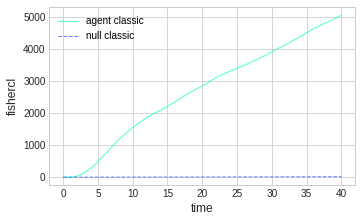

In [33]:
Grad = ['#00ffba','#1f52fe','#ff0078','#C70039','#FF5733','#ff0078','#ff0078','#C70039','#00ffba','#1f52fe','#FFC300','#FF5733','#00dfff','#FFA500']
mpl.rcParams['axes.prop_cycle'] =cycler(color=Grad)

plt.rcParams['figure.figsize'] = figsize(1.5)
plt.figure('Fisher')
fig, ax = plt.subplots()
ax.plot(x,DATA['FCmean'],linestyle='solid',linewidth=1,label=r'agent classic',alpha=a)
#ax.fill_between(x, DATA['FCmean']-0.5*DATA['FCstd'], DATA['FCmean']+0.5*DATA['FCstd'],alpha=0.3)
ax.plot(x,DATA['FCmean2'],linestyle='dashed',linewidth=1,label=r'null classic',alpha=a)
#ax.fill_between(x, DATA['FCmean2']-0.5*DATA['FCstd2'], DATA['FCmean2']+0.5*DATA['FCstd2'],alpha=0.3)
#plt.yscale('log')
leg = ax.legend(prop={'size': 10})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')
plt.xlabel('time')
plt.ylabel('fishercl')
plt.tight_layout()

plt.savefig('bayesfisher1.pdf',dpi=300)

<Figure size 367.621x227.203 with 0 Axes>

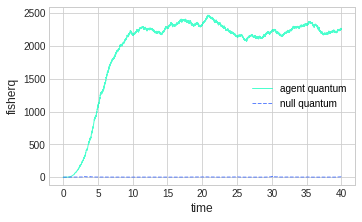

In [32]:
plt.figure('Fisher')
fig, ax = plt.subplots()
ax.plot(x,DATA['FQmean'],linestyle='solid',linewidth=1,label=r'agent quantum',alpha=a)
#ax.fill_between(x, DATA['FQmean']-0.5*DATA['FQstd'], DATA['FQmean']+0.5*DATA['FQstd'],alpha=0.3)
ax.plot(x,DATA['FQmean2'],linestyle='dashed',linewidth=1,label=r'null quantum',alpha=a)
#ax.fill_between(x, DATA['FQmean2']-0.5*DATA['FQstd2'], DATA['FQmean2']+0.5*DATA['FQstd2'],alpha=0.3)
#plt.yscale('log')
leg = ax.legend(prop={'size': 10})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')
plt.xlabel('time')
plt.ylabel('fisherq')
plt.tight_layout()

plt.savefig('bayesfisher2.pdf',dpi=300)

<Figure size 735.243x735.243 with 0 Axes>

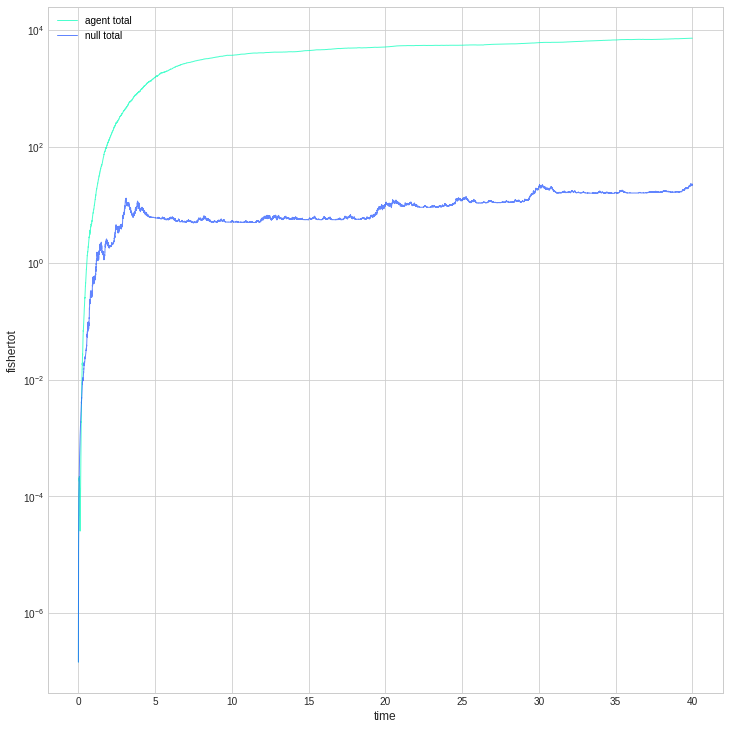

In [28]:
plt.figure('Fisher')
fig, ax = plt.subplots()
ax.plot(x,DATA['FQmean']+DATA['FCmean'],linestyle='solid',linewidth=1,label=r'agent total',alpha=a)
ax.plot(x,DATA['FQmean2']+DATA['FCmean2'],linestyle='solid',linewidth=1,label=r'null total',alpha=a)

plt.yscale('log')
leg = ax.legend(prop={'size': 10})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')
plt.xlabel('time')
plt.ylabel('fishertot')
plt.tight_layout()

plt.savefig('bayesfisher3.pdf',dpi=300)

<Figure size 735.243x735.243 with 0 Axes>

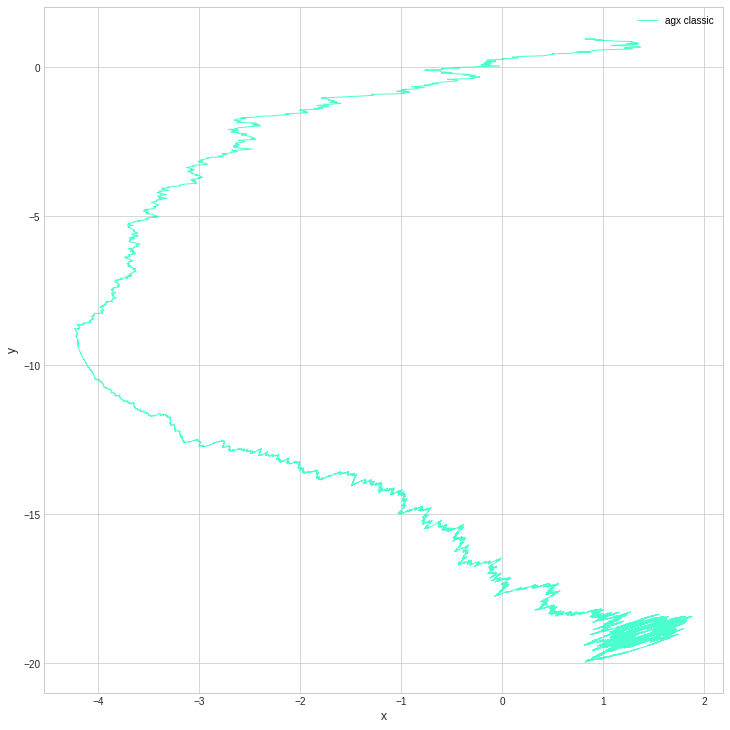

In [27]:
Grad = ['#00ffba','#1f52fe','#ff0078','#C70039','#FF5733','#ff0078','#ff0078','#C70039','#00ffba','#1f52fe','#FFC300','#FF5733','#00dfff','#FFA500']
mpl.rcParams['axes.prop_cycle'] =cycler(color=Grad)

plt.rcParams['figure.figsize'] = figsize(3,aspect_ratio=1)
plt.figure('Fisher')
fig, ax = plt.subplots()
#ax.plot(x,DATA['rmean'][:,0],linestyle='solid',linewidth=1,label=r'agx classic',alpha=a)
ax.plot(DATA['rmean'][:,0],DATA['rmean'][:,1],linestyle='solid',linewidth=1,label=r'agx classic',alpha=a)
#ax.plot(x,DATA['rmean'][:,1],linestyle='solid',linewidth=1,label=r'agp classic',alpha=a)
#ax.fill_between(x, DATA['puritymean']-0.5*DATA['puritystd'], DATA['puritymean']+0.5*DATA['puritystd'],alpha=0.3)
#ax.plot(x,DATA['rmean2'][:,0],linestyle='dashed',linewidth=1,label=r'senzax classic',alpha=a)
#ax.plot(x,DATA['rmean2'][:,0],linestyle='dashed',linewidth=1,label=r'senzap classic',alpha=a)
#ax.fill_between(x, DATA['puritymean2']-0.5*DATA['puritystd2'], DATA['puritymean2']+0.5*DATA['puritystd2'],alpha=0.3)

leg = ax.legend(prop={'size': 10})
text=leg.get_texts()
for i in range(0,len(text)):
    text[i].set_color('black')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
